In [2]:
#Importing libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O 
import os
import matplotlib.pyplot as plt#visualization
from PIL import  Image
%matplotlib inline
import pandas as pd
import seaborn as sns#visualization
import itertools
import warnings
warnings.filterwarnings("ignore")
import io
import plotly.offline as py#visualization
py.init_notebook_mode(connected=True)#visualization
import plotly.graph_objs as go#visualization
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization

# 1. Data Importing

In [3]:
import pandas as pd
new = pd.read_csv (r"C:\Users\admin\Desktop\Machine Learning\Random Forest\Problem 3\admission.csv")

In [4]:
#first few rows
new.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


# 2. Data Pre-Processing 

1. Data Type and conversion
2. Data Manipulation

#### 2.1. Data Type and conversion

In [5]:
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


#### 2.2. Data Manipulation

In [7]:
new.drop('Serial No.',axis = 1, inplace = True)

In [11]:
new.rename(columns = {'LOR ' : 'LOR', 'Chance of Admit ' : 'Chance_of_Admit'}, inplace = True)

In [12]:
new.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


# 3. Missing Value Identify & Treatment

In [13]:
# count the number of NaN values in each column
print(new.isnull().sum())

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance_of_Admit      0
dtype: int64


In [14]:
new.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance_of_Admit'],
      dtype='object')

<AxesSubplot:>

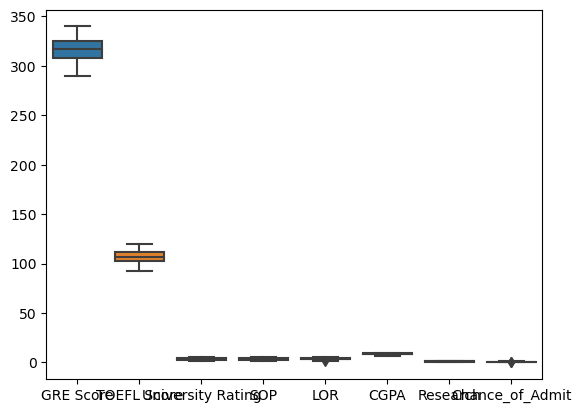

In [15]:
sns.boxplot(data = new)  # all Variable

In [16]:
new.select_dtypes(include=[np.number]).columns.tolist()

['GRE Score',
 'TOEFL Score',
 'University Rating',
 'SOP',
 'LOR',
 'CGPA',
 'Research',
 'Chance_of_Admit']

In [18]:
for i in new['Chance_of_Admit']:
    if i >= 0.80:
        new['Chance_of_Admit'].replace(i, 'High', inplace = True)
    else:
        new['Chance_of_Admit'].replace(i, 'Low', inplace = True)

In [19]:
new.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,337,118,4,4.5,4.5,9.65,1,High
1,324,107,4,4.0,4.5,8.87,1,Low
2,316,104,3,3.0,3.5,8.00,1,Low
3,322,110,3,3.5,2.5,8.67,1,High
4,314,103,2,2.0,3.0,8.21,0,Low


In [20]:
# #Employee Numeric columns
Quantitative_Data = new[new.select_dtypes(include=[np.number]).columns.tolist()]
Quantitative_Data.head(3)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1


In [22]:
Qualitative_Data = []

In [23]:
for i in new['Chance_of_Admit']:
    if i == 'High':
        Qualitative_Data.append(1)
    else:
        Qualitative_Data.append(0)

In [25]:
Qualitative_Data = pd.DataFrame(Qualitative_Data)
Qualitative_Data.head()

,0
0,1
1,0
2,0
3,1
4,0


In [26]:
Qualitative_Data.rename(columns = {0 : 'Chance_of_Admit'}, inplace = True)

In [27]:
Qualitative_Data.head()

,Chance_of_Admit
0,1
1,0
2,0
3,1
4,0


In [28]:
final_combined = pd.concat([Quantitative_Data, Qualitative_Data],axis=1)
final_combined.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,337,118,4,4.5,4.5,9.65,1,1
1,324,107,4,4.0,4.5,8.87,1,0
2,316,104,3,3.0,3.5,8.00,1,0
3,322,110,3,3.5,2.5,8.67,1,1
4,314,103,2,2.0,3.0,8.21,0,0


# Data Partition 

In [29]:
from sklearn.model_selection import train_test_split

# define our input variable (X) & output variable
X = final_combined.drop('Chance_of_Admit', axis = 1)
Y = final_combined[['Chance_of_Admit']]
# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=435236)

In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

# by default 100 tree will be form 
Model = RandomForestClassifier(n_estimators=20, # make 20 tress
                               criterion="gini",
                               max_depth=4,  # each tree will have 4 branches
                               min_samples_split=60,# each tree will have parent node
                               min_samples_leaf=30,# each tree will have Child node
                               max_features="sqrt")# n_estimators means number tree we want  

Model.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, max_features='sqrt', min_samples_leaf=30,
                       min_samples_split=60, n_estimators=20)

# Importance Features

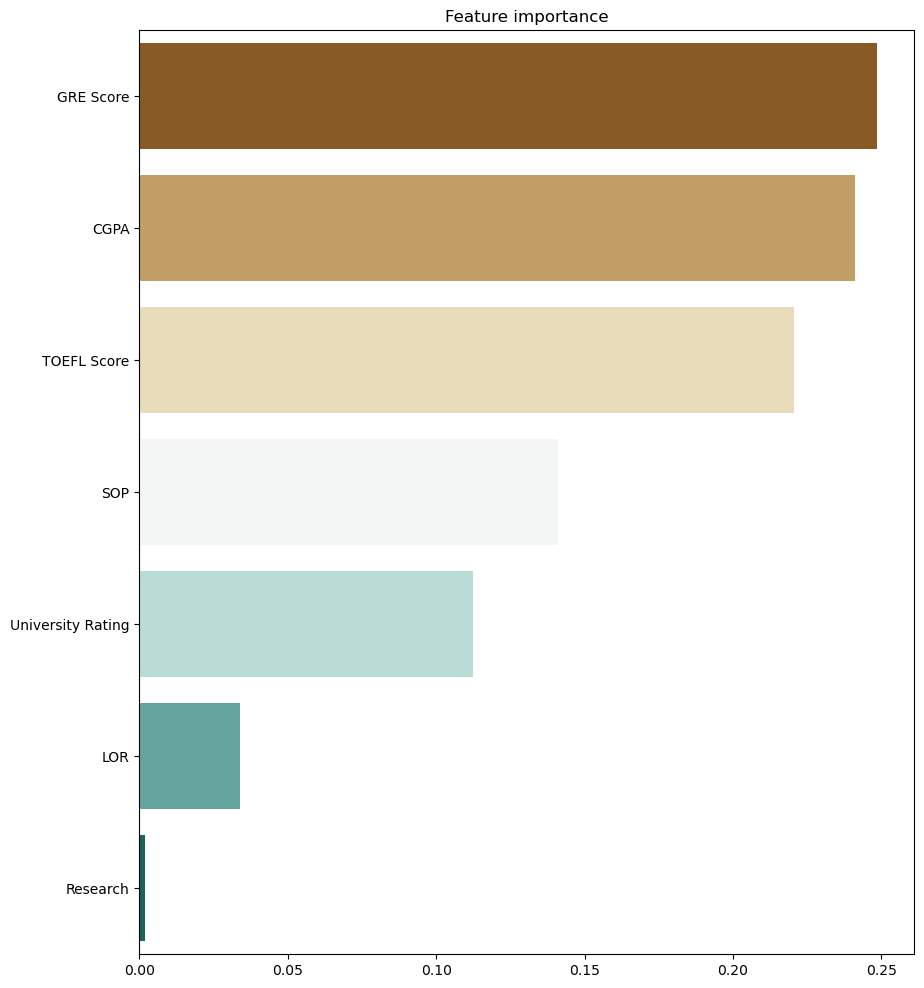

In [32]:
# Plot features importances
imp = pd.Series(data=Model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,12))
plt.title("Feature importance")
ax = sns.barplot(y=imp.index, x=imp.values, palette="BrBG", orient='h')


# Random Forest Visualization

In [33]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


In [34]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot

In [35]:
list(X.columns)

['GRE Score',
 'TOEFL Score',
 'University Rating',
 'SOP',
 'LOR',
 'CGPA',
 'Research']

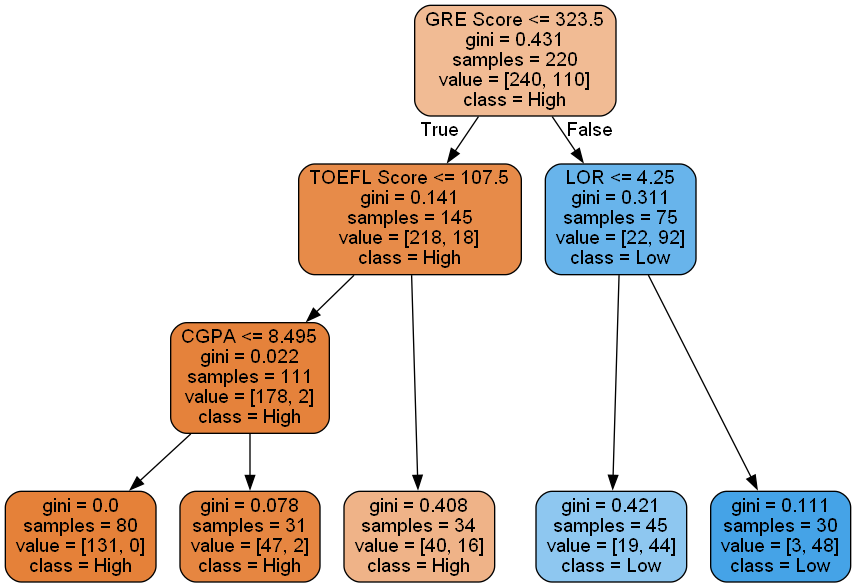

In [36]:
tree = Model.estimators_[5]  # specify the tree number   
Chance_of_Admit=['High','Low'] 
feature_list = list(X.columns)  # all independent variable name

export_graphviz(tree, out_file = 'abc.dot', 
                feature_names = feature_list, 
                leaves_parallel=True,
                class_names=Chance_of_Admit,
                rounded = True, 
                filled=True)
# Use dot file to create a graph
(graph,)= pydot.graph_from_dot_file('abc.dot')
# Write graph to a png file
graph.write_png('tree.png')
from IPython.display import Image
Image(filename = 'tree.png')

# Step 6 : Predictions on Train Dataset

In [37]:
train=pd.concat([X_train,y_train],axis=1)
train.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
138,326,116,2,4.5,3.0,9.08,1,1
440,305,104,2,2.5,1.5,7.79,0,0
357,301,104,2,3.5,3.5,7.89,1,0
401,315,105,2,3.0,3.0,8.34,0,0
400,304,100,2,3.5,3.0,8.22,0,0


In [38]:
train['Predicted']=Model.predict(X_train)
train.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance_of_Admit,Predicted
138,326,116,2,4.5,3.0,9.08,1,1,1
440,305,104,2,2.5,1.5,7.79,0,0,0
357,301,104,2,3.5,3.5,7.89,1,0,0
401,315,105,2,3.0,3.0,8.34,0,0,0
400,304,100,2,3.5,3.0,8.22,0,0,0


# Step 7 : Model Performance Metrics

In [39]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(train['Chance_of_Admit'], train['Predicted'])
print(confusion_matrix)

[[235  10]
 [ 19  86]]


In [40]:
Accuracy_Train=((235+86)/(350)*100)
print(Accuracy_Train)

91.71428571428571


In [41]:
from sklearn.metrics import classification_report
print(classification_report(train['Chance_of_Admit'], train['Predicted']))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94       245
           1       0.90      0.82      0.86       105

    accuracy                           0.92       350
   macro avg       0.91      0.89      0.90       350
weighted avg       0.92      0.92      0.92       350



# Step 8 : Predictions on Test Dataset

In [42]:
test=pd.concat([X_test,y_test],axis=1)
test.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
41,316,105,2,2.5,2.5,8.20,1,0
312,311,107,4,4.5,4.5,9.00,1,0
488,322,112,3,3.0,4.0,8.62,1,0
319,327,113,4,3.5,3.0,8.69,1,1
278,308,103,2,3.0,3.5,8.49,0,0


In [43]:
test['Predicted']=Model.predict(X_test)
test.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance_of_Admit,Predicted
41,316,105,2,2.5,2.5,8.20,1,0,0
312,311,107,4,4.5,4.5,9.00,1,0,0
488,322,112,3,3.0,4.0,8.62,1,0,0
319,327,113,4,3.5,3.0,8.69,1,1,0
278,308,103,2,3.0,3.5,8.49,0,0,0


# Step 9 : Model Performance Metrics on Test data 

In [44]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(test['Predicted'],test['Chance_of_Admit'])
print(confusion_matrix)

[[95 11]
 [ 5 39]]


In [45]:
Accuracy_test=((95+39)/(150)*100)
Accuracy_test

89.33333333333333

In [46]:
from sklearn.metrics import classification_report
print(classification_report(test['Chance_of_Admit'], test['Predicted']))

              precision    recall  f1-score   support

           0       0.90      0.95      0.92       100
           1       0.89      0.78      0.83        50

    accuracy                           0.89       150
   macro avg       0.89      0.86      0.88       150
weighted avg       0.89      0.89      0.89       150



# Finish

## Business Submission

Serial No. ,Chance of Admit

#### Confusion Matrix on Train

In [47]:
print(classification_report(train['Chance_of_Admit'], train['Predicted']))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94       245
           1       0.90      0.82      0.86       105

    accuracy                           0.92       350
   macro avg       0.91      0.89      0.90       350
weighted avg       0.92      0.92      0.92       350



#### Model

In [48]:
import pickle

pickle.dump(Model, open('RF_Model.pkl','wb'))  # Exporting model from python to laptop

# Business Use Case -- Live Data

In [49]:
Finalmodel=pickle.load(open('RF_Model.pkl','rb'))  # import Model from laptop to python 

In [50]:
Live_data=X_test.iloc[0:4,:]
Live_data

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
41,316,105,2,2.5,2.5,8.20,1
312,311,107,4,4.5,4.5,9.00,1
488,322,112,3,3.0,4.0,8.62,1
319,327,113,4,3.5,3.0,8.69,1


In [51]:
Live_data['Predicted']=Finalmodel.predict(Live_data)
Live_data

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Predicted
41,316,105,2,2.5,2.5,8.20,1,0
312,311,107,4,4.5,4.5,9.00,1,0
488,322,112,3,3.0,4.0,8.62,1,0
319,327,113,4,3.5,3.0,8.69,1,0


* 0 = Low chances to admit
* 1 = High chances to admit

# FINISHED